<a href="https://colab.research.google.com/github/NeelayS/Detecting-Malaria-from-Cell-Images/blob/master/CNN_Resnet34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
from fastai.vision import *

In [0]:
pwd

'/content'

In [0]:
path = Path('/content/drive/My Drive/Projects/Malaria_Detection/Images')

In [0]:
classes = ['Uninfected','Parasitized']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Parasitized', 'Uninfected'], 2, 3224, 805)

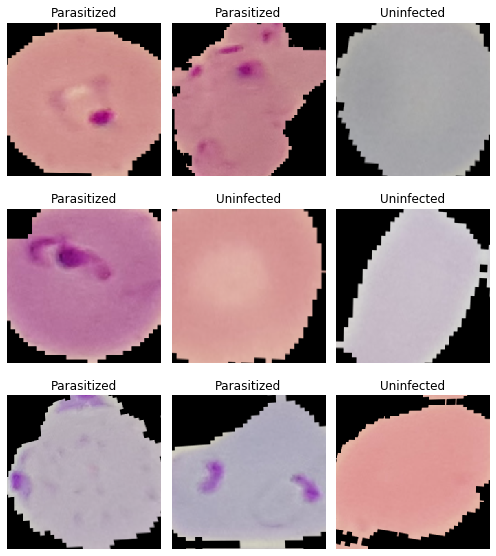

In [0]:
data.show_batch(rows=3, figsize=(7,8))


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
epochs = 10


In [0]:
learn.model.cuda()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
learn.fit_one_cycle(epochs)

epoch,train_loss,valid_loss,error_rate,time
0,0.712601,0.250339,0.085714,00:31
1,0.509487,0.212953,0.070807,00:31
2,0.379029,0.184506,0.063354,00:31
3,0.288142,0.172414,0.068323,00:31
4,0.254342,0.157822,0.064596,00:30
5,0.225916,0.149002,0.054658,00:31
6,0.206192,0.140813,0.054658,00:30
7,0.183376,0.137685,0.054658,00:30
8,0.165561,0.133709,0.054658,00:30
9,0.168422,0.134925,0.057143,00:30


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


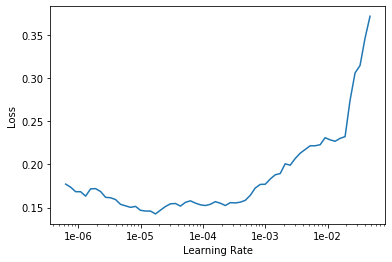

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(epochs, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.166071,0.133256,0.053416,00:32
1,0.173932,0.133855,0.053416,00:33
2,0.166066,0.129221,0.047205,00:32
3,0.158636,0.127760,0.048447,00:32
4,0.153111,0.126345,0.052174,00:32
5,0.151190,0.124034,0.049689,00:32
6,0.145297,0.126600,0.047205,00:32
7,0.140115,0.125181,0.044720,00:32
8,0.143408,0.124786,0.047205,00:32
9,0.142652,0.125663,0.048447,00:32


In [0]:
learn.save('stage-2')
learn.export()